## Indian Liver Patient DataSet


### Step - 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score



### Step - 2 loading Indian Liver Patient DataSet

In [3]:
df = pd.read_csv(r"C:\Users\Vignesh\Downloads\indian_liver_patient - indian_liver_patient.csv")


### Step - 3 Inspecting Data

In [4]:
df.head()     

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


### Step - 4 Data Cleaning 
### Handling Missing Values
### Removing Duplicates

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
df.fillna({'Albumin_and_Globulin_Ratio': df['Albumin_and_Globulin_Ratio'].median()}, inplace=True)



In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(13)

In [14]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (570, 11)


### Step - 5 Encode Catagorical Column

In [15]:
df['Dataset'].value_counts()


Dataset
1    406
2    164
Name: count, dtype: int64

In [16]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


### Step - 6 Encode Target Column

In [17]:
# 1 = Liver Disease, 2 = Healthy → map 2 to 0
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})


### Step - 7 Define Features and Target

In [18]:
X = df.drop('Dataset', axis=1)
y = df['Dataset']


In [19]:
import numpy as np

# 1. Check for NaN values
print("Missing values:\n", df.isnull().sum())

# 2. Check for infinite values
print("Any infinite values? ", np.isinf(df).sum().sum())

# 3. Drop or replace missing values
df = df.replace([np.inf, -np.inf], np.nan)  # convert inf to NaN
df = df.dropna()  # OR df.fillna(df.median(), inplace=True)


Missing values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64
Any infinite values?  0


### Step - 8 Feature Scaling

In [20]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Step - 9 Handle Imbalanced Data using SMOTE 

In [21]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

### Step - 10 Split into Train and Test Set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


### Step - 11 Train Logistic Regression 

In [23]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Step - 12 Make Predictions

In [24]:
y_pred = model.predict(X_test)


### Step - 13 Evaluate the Model

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7361963190184049

Confusion Matrix:
 [[71 11]
 [32 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.87      0.77        82
           1       0.82      0.60      0.70        81

    accuracy                           0.74       163
   macro avg       0.75      0.74      0.73       163
weighted avg       0.75      0.74      0.73       163

Precision: 0.8166666666666667
Recall: 0.6049382716049383
F1 Score: 0.6950354609929078


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15],
    'class_weight': ['balanced', None]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall')

# Fit on training data
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_rf.best_params_)

# Predict on test set
y_pred_rf = grid_rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        82
           1       0.86      0.77      0.81        81

    accuracy                           0.82       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.83      0.82      0.82       163



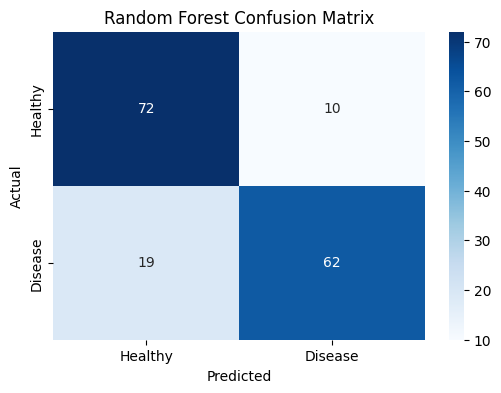

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1️⃣ Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# 2️⃣ Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Disease'], yticklabels=['Healthy', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [28]:
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 1: Define features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# ✅ Step 2: Balance classes with SMOTE (before scaling)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# ✅ Step 3: Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# ✅ Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5: Train best model (Random Forest from GridSearch)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15],
    'class_weight': ['balanced', None]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall')
grid_rf.fit(X_train_scaled, y_train)

best_model = grid_rf.best_estimator_

# ✅ Step 6: Evaluate
y_pred = best_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 7: Save model and scaler
os.makedirs("models", exist_ok=True)

with open("models/liver_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("models/liver_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Liver Disease Model and Scaler saved successfully!")


Accuracy: 0.8282208588957055

Confusion Matrix:
 [[72 10]
 [18 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        82
           1       0.86      0.78      0.82        81

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.83      0.83      0.83       163

✅ Liver Disease Model and Scaler saved successfully!
